# 07 - Evaluation of Document Clusters from Doc2Vec
In this notebook the clusters from the Doc2Vec analysis are evaluated against general characteristics and energy performance of municipalities. All evaluation data is preprocessed to ordinal variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


In [2]:
# Reading the k-means clustering from the Doc2Vec analysis, the dataframe already contains the evaluation data
doc2vec_clusters = pd.read_parquet("../data/Governance/Doc2Vec_clusters.parquet")


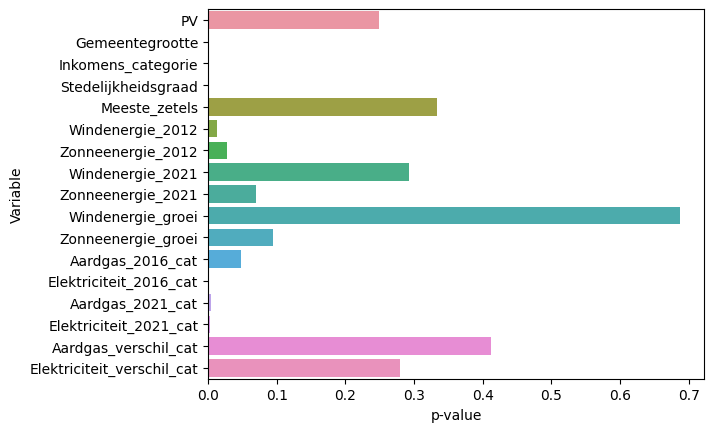

In [3]:
# calculate chi-squared statistic for evaluation data, values lower than 0.05 the clusters are different than expected than random assignment
variables = doc2vec_clusters.columns[3:20]
chi2_probabilities = []
for var in variables:
    crosstab = pd.crosstab(doc2vec_clusters['cluster'], doc2vec_clusters[var])
    c, p, dof, expected = chi2_contingency(crosstab)
    chi2_probabilities.append([var, p])
    
chi2_probabilities_df = pd.DataFrame(chi2_probabilities, columns = ["Variable", "p-value"])
sns.barplot(y = 'Variable', x = 'p-value', data = chi2_probabilities_df);


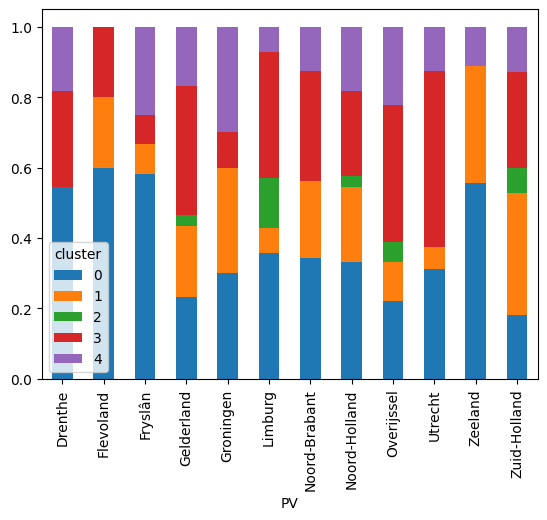

In [4]:
provincie_crosstab = pd.crosstab(doc2vec_clusters['PV'], doc2vec_clusters['cluster'], normalize='index')
provincie_crosstab.plot(kind="bar", stacked=True);


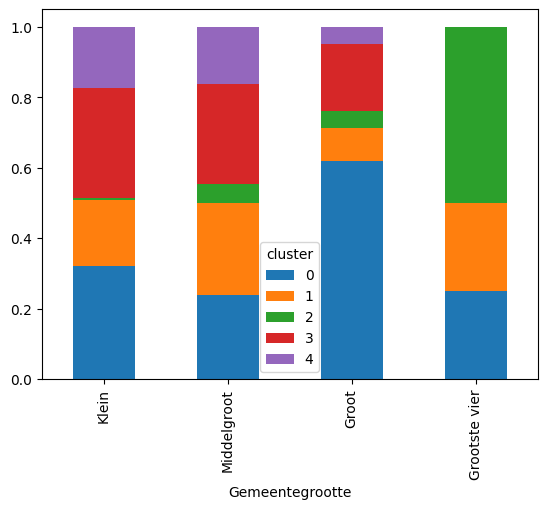

In [5]:
gemeentegrootte_crosstab = pd.crosstab(doc2vec_clusters['Gemeentegrootte'], doc2vec_clusters['cluster'], normalize='index')
gemeentegrootte_crosstab.plot(kind="bar", stacked=True);


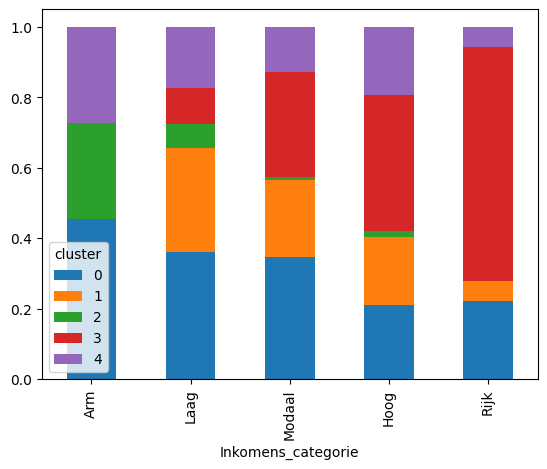

In [6]:
inkomen_crosstab = pd.crosstab(doc2vec_clusters['Inkomens_categorie'], doc2vec_clusters['cluster'], normalize='index')
inkomen_crosstab.plot(kind="bar", stacked=True);


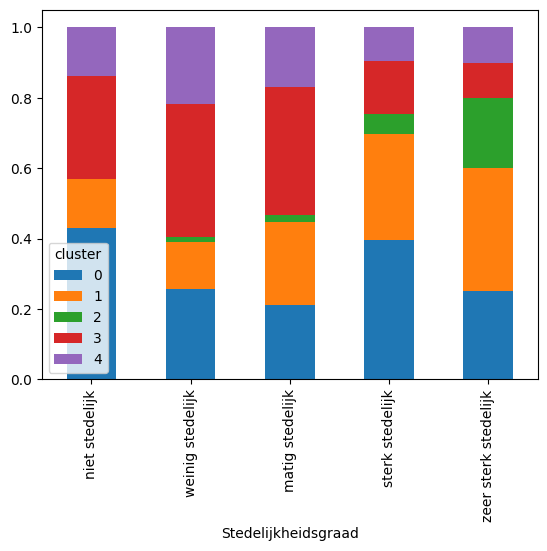

In [7]:
stedelijkheid_crosstab = pd.crosstab(doc2vec_clusters['Stedelijkheidsgraad'], doc2vec_clusters['cluster'], normalize='index')
stedelijkheid_crosstab.plot(kind="bar", stacked=True);


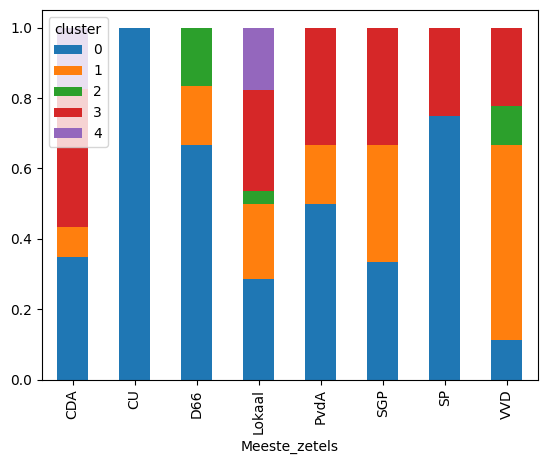

In [8]:
zetels_crosstab = pd.crosstab(doc2vec_clusters['Meeste_zetels'], doc2vec_clusters['cluster'], normalize='index')
zetels_crosstab.plot(kind="bar", stacked=True);


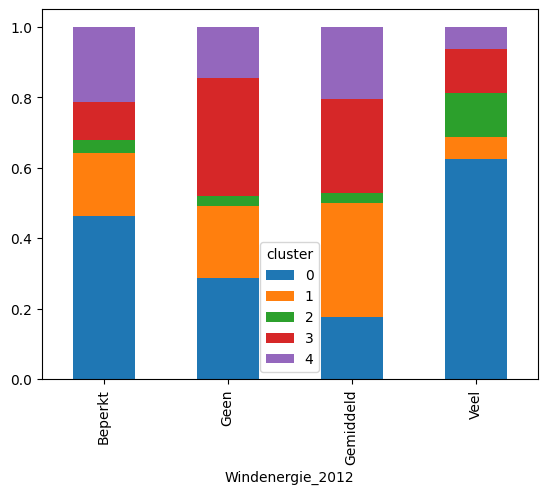

In [9]:
wind2012_crosstab = pd.crosstab(doc2vec_clusters['Windenergie_2012'], doc2vec_clusters['cluster'], normalize='index')
wind2012_crosstab.plot(kind="bar", stacked=True);


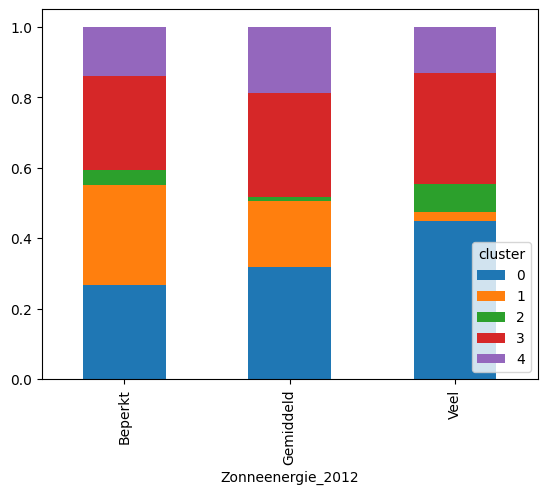

In [10]:
zon2012_crosstab = pd.crosstab(doc2vec_clusters['Zonneenergie_2012'], doc2vec_clusters['cluster'], normalize='index')
zon2012_crosstab.plot(kind="bar", stacked=True);


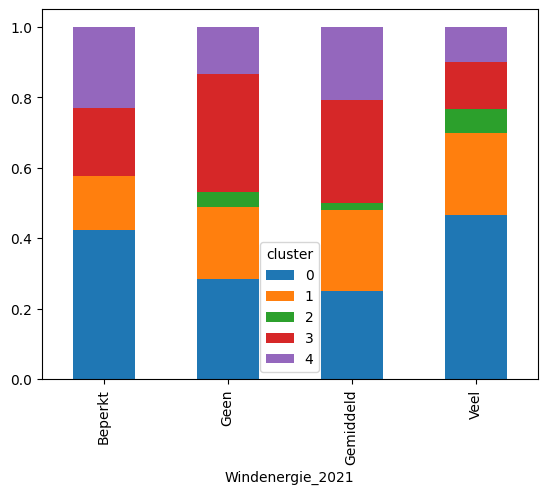

In [11]:
wind2021_crosstab = pd.crosstab(doc2vec_clusters['Windenergie_2021'], doc2vec_clusters['cluster'], normalize='index')
wind2021_crosstab.plot(kind="bar", stacked=True);


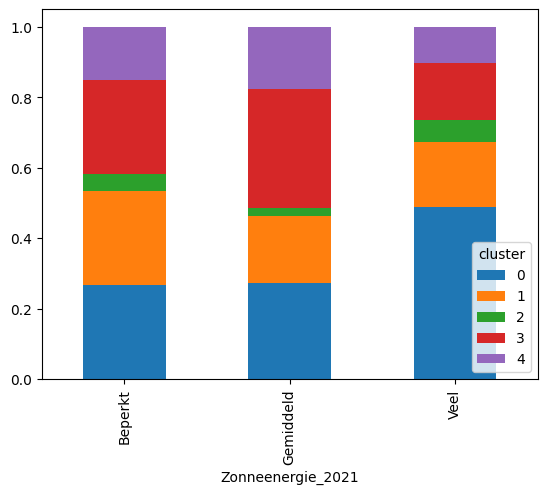

In [12]:
zon2021_crosstab = pd.crosstab(doc2vec_clusters['Zonneenergie_2021'], doc2vec_clusters['cluster'], normalize='index')
zon2021_crosstab.plot(kind="bar", stacked=True);


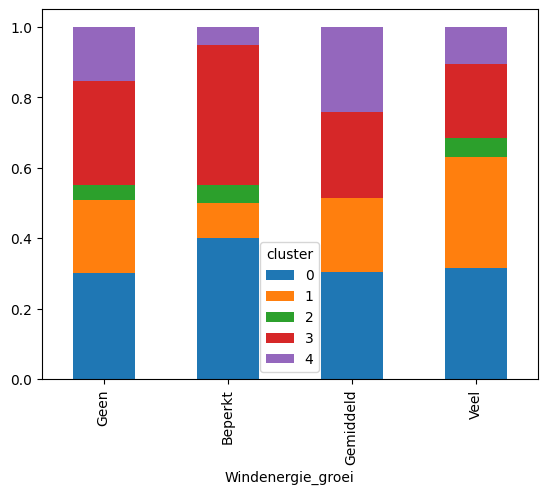

In [13]:
windgroei_crosstab = pd.crosstab(doc2vec_clusters['Windenergie_groei'], doc2vec_clusters['cluster'], normalize='index')
windgroei_crosstab.plot(kind="bar", stacked=True);


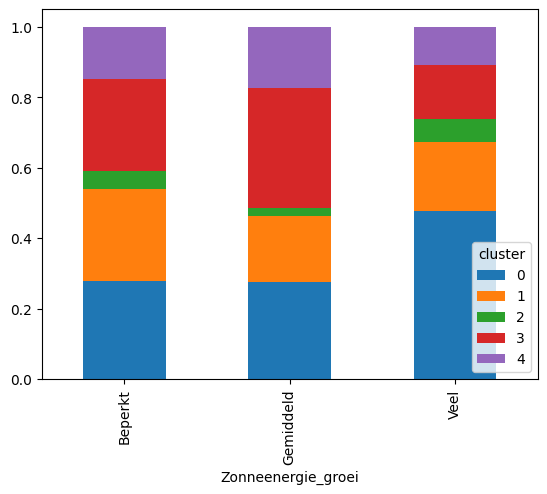

In [14]:
zongroei_crosstab = pd.crosstab(doc2vec_clusters['Zonneenergie_groei'], doc2vec_clusters['cluster'], normalize='index')
zongroei_crosstab.plot(kind="bar", stacked=True);


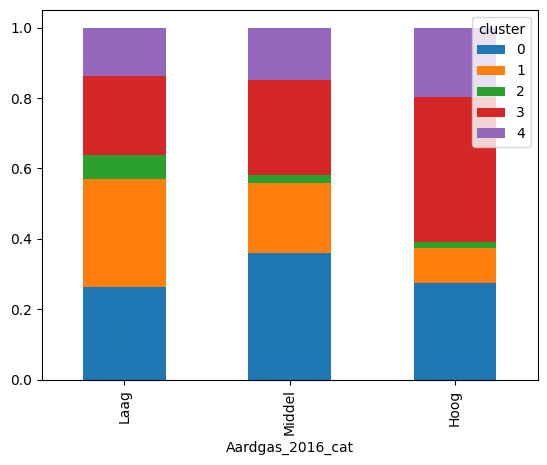

In [15]:
aardgas2016_crosstab = pd.crosstab(doc2vec_clusters['Aardgas_2016_cat'], doc2vec_clusters['cluster'], normalize='index')
aardgas2016_crosstab.plot(kind="bar", stacked=True);


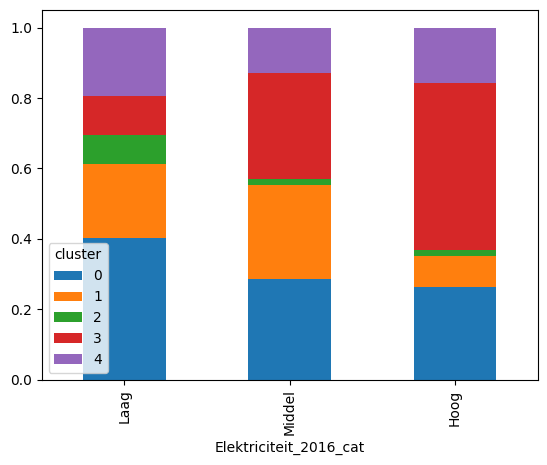

In [16]:
elektriciteit2016_crosstab = pd.crosstab(doc2vec_clusters['Elektriciteit_2016_cat'], doc2vec_clusters['cluster'], normalize='index')
elektriciteit2016_crosstab.plot(kind="bar", stacked=True);


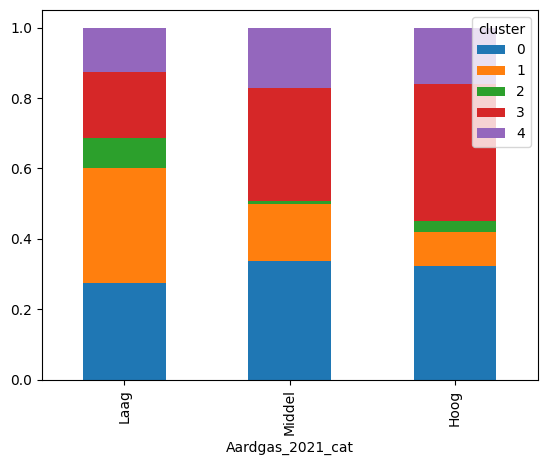

In [17]:
aardgas2021_crosstab = pd.crosstab(doc2vec_clusters['Aardgas_2021_cat'], doc2vec_clusters['cluster'], normalize='index')
aardgas2021_crosstab.plot(kind="bar", stacked=True);


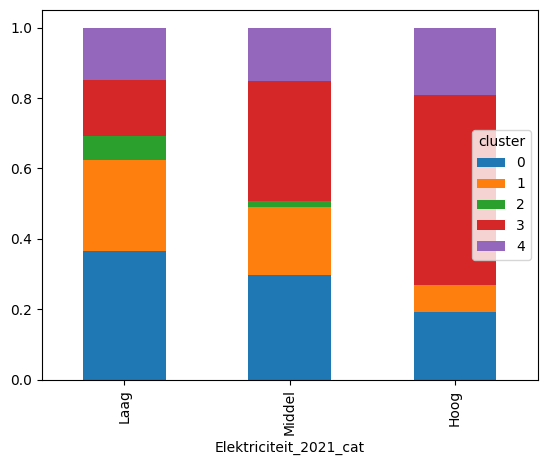

In [18]:
elektriciteit2021_crosstab = pd.crosstab(doc2vec_clusters['Elektriciteit_2021_cat'], doc2vec_clusters['cluster'], normalize='index')
elektriciteit2021_crosstab.plot(kind="bar", stacked=True);


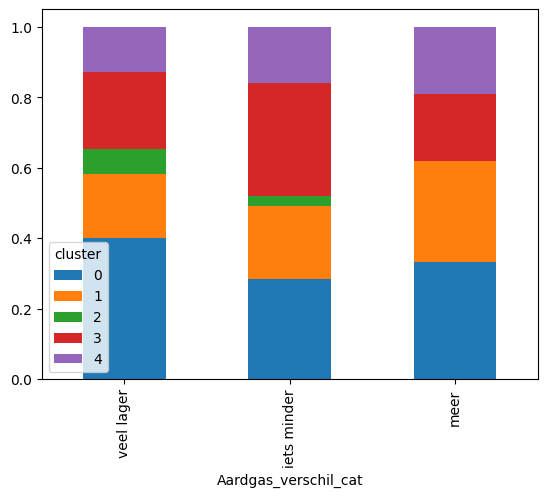

In [19]:
aardgasverschil_crosstab = pd.crosstab(doc2vec_clusters['Aardgas_verschil_cat'], doc2vec_clusters['cluster'], normalize='index')
aardgasverschil_crosstab.plot(kind="bar", stacked=True);


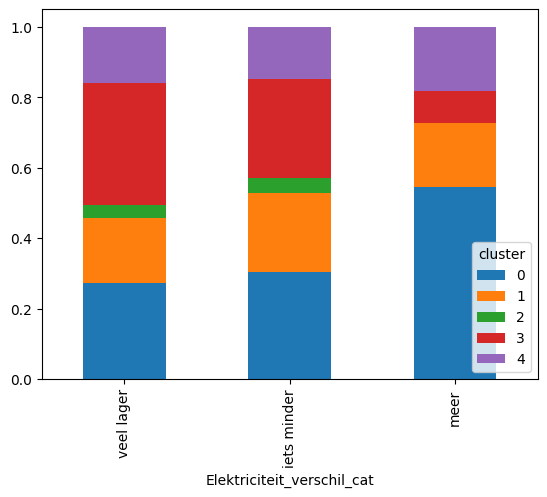

In [20]:
elektriciteitverschil_crosstab = pd.crosstab(doc2vec_clusters['Elektriciteit_verschil_cat'], doc2vec_clusters['cluster'], normalize='index')
elektriciteitverschil_crosstab.plot(kind="bar", stacked=True);


### Comparison of LSA and Doc2Vec clusters
Clustering on policy documents was performed using latent semenantic analysis and Doc2Vec. Below these two clusterings are compared for the documents that are in it.

In [21]:
kmeans_clusters = pd.read_parquet("../data/Governance/Kmeans_clusters.parquet")
all_clusters = doc2vec_clusters.join(kmeans_clusters).loc[:, ['cluster', 'labels']]
all_clusters = all_clusters.rename({'cluster': 'Doc2Vec', 'labels': 'LSA'}, axis=1)
all_clusters.to_csv("../data/Governance/Clusters_LSA_Doc2Vec.csv")


p-value for difference between clusters: 5.154002727303186e-51


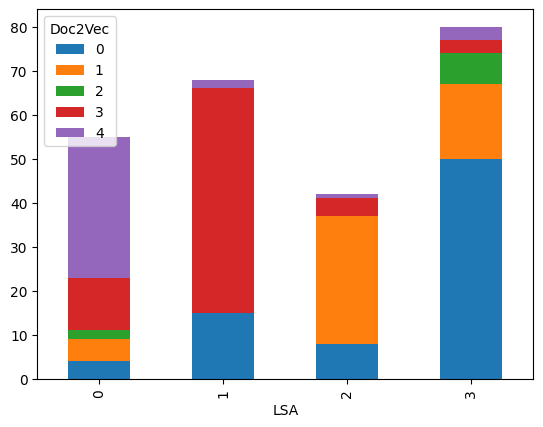

In [22]:
crosstab = pd.crosstab(all_clusters['LSA'], all_clusters['Doc2Vec'])
c, p, dof, expected = chi2_contingency(crosstab)
print ("p-value for difference between clusters: " + str(p))
crosstab.plot(kind="bar", stacked=True);
